<a href="https://colab.research.google.com/github/deutschkihun/Data-Analysis/blob/master/WeRateDog_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeRateDog Tweet Analysis



## Structure

- **[1. Importing the prerequisite libraries](#imports)**
- **[2. TwitterArchive.csv](#TwitterArchive)**
- **[3. ImagePrediction.tsv](#ImagePrediction)**
- **[4.TwitterAPI.csv](#twitterAPI)**
- **[5. Data Visualization](#DV)**
- **[6. Conclusion](#conclusion)**

## Source file folder 
https://drive.google.com/drive/folders/1MvOOymXwZXuK2PU8JqBCJhBxQHwM6Q72?usp=sharing

## How did I collected this data ? Please check out following link
[WeRatedog Tweet crawling](https://drive.google.com/file/d/1LBvyzG7m7pFzJmnpgT8D9tNCAF2pTwJj/view?usp=sharing)

# <a name="imports"></a> 1. Importing the prerequisite libraries

In [ ]:
# load necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# <a name="TwitterArchive"></a> 2. TwitterArchive

## 2.1 TwitterArchive Cleaning (Quality Problem)

In [ ]:
df = pd.read_csv('TwitterArchive.csv')

### 2.1.1 `None` is not identifed as a missing value 

In [ ]:
value = np.nan
df=df.replace({'None':value})

In [ ]:
df[df['doggo'].str.contains('None',na=False)]
# "None" is removed 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 2.1.2 Unnecessary string `'+0000'` in 'timestamp'

In [ ]:
df['timestamp']=df['timestamp'].str.rstrip('+0000')

In [ ]:
df['timestamp'].head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

### 2.1.3 timestampe has `wrong datatype`

In [ ]:
import datetime
df['timestamp']=pd.to_datetime(df['timestamp'])

### 2.1.4 Because of the length of text in table, it's not able to `display entire table`

In [ ]:
pd.set_option('display.max_colwidth', -1)

### 2.1.5  descending `twitter ID`

In [ ]:
df=df.sort_values(by='tweet_id',ascending=True)
df = df.reset_index(drop=True)

### 2.1.6 invaild data `name`

In [ ]:
df['name'].value_counts().head(12)

# A,An and The can't be  name. replace name with start 'a' and 't'

a          55
Charlie    12
Oliver     11
Cooper     11
Lucy       11
Tucker     10
Penny      10
Lola       10
Winston    9 
Bo         9 
Sadie      8 
the        8 
Name: name, dtype: int64

In [ ]:
df['name'] = df['name'].replace({'a':'Alexander'})
df['name'] = df['name'].replace({'an':'Adrian'})
df['name'] = df['name'].replace({'the':'Thomas'})

## 2.2 TwitterArchive Cleaning (Tidiness Problem)

### 2.2.1 Column 'text' contains url but exist already only for `expanded_urls`

- Remove `expanded_urls`
- extract url from `text`

In [ ]:
url=df['text'].str.extract(r'(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\/([-a-zA-Z0-9()@:%_\+.~#?&//=]*))', expand=True)[0]


# Alternative :using re library 
# Documentation  : https://docs.python.org/3/library/re.html
#import re
#url = [re.findall(r'http.*',x,re.I)[0] for x in tae['text']]

In [ ]:
# we add need to add  so that the last element will not get cut off 
df.text = df.text + ' '


# check whether all data in text column has 'url with start http' in the end 
print((df.text.str.contains("http")==False).sum())

# use lambda,strip,apply fuction 
df.text = df.text.apply(lambda x : x[:x.find('http')]).str.strip()

70


In [ ]:
# change the format to DataFrame
url = pd.DataFrame(data=url)

In [ ]:
# merge text in tae column and remmove expanded_urls column 
df = pd.merge(df,url, right_index=True, left_index=True)
#remmove unnecessary column "expanded_urls" 
df=df.drop(columns=['expanded_urls'])

In [ ]:
# rename column '0' to 'url'
df= df.rename(columns={0: 'url'})

### 2.2.2 Arange `columns position`

In [ ]:
# arange the position of column  
df = pd.DataFrame(df,columns=[  'tweet_id','timestamp', 'source', 'text','url',
      'rating_numerator','rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ])

# <a name="ImagePrediction"></a> 3. ImagePrediction.tsv

In [ ]:
df2 = pd.read_csv('ImagePrediction.tsv',sep='\t')

## 3.1 ImagePrediction Cleaning (Quality Problem) 

### 3.1.1 Wrong name of `breed`

In [ ]:
df2=df2.replace({'Leonberg':'Leonberger'})

###  3.1.2 inconsistent `url typ`

In [ ]:
#find not jpg urls 
url = np.array(df2['jpg_url'])
list = []
for item in url : 
    if '.jpg' not in item:
        list.append(item)
        
print(list)

['https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png', 'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png']


In [ ]:
df2['jpg_url']=df2['jpg_url'].replace({'https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png'
                                                                 :'https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.jpg'})
                                                              

In [ ]:
df2['jpg_url']=df2['jpg_url'].replace({'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png'
                                                                 :'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.jpg'})

`Test`

# <a name="twitterAPI"></a> 4. TwitterAPI.csv

In [ ]:
df3 = pd.read_csv('twitter_api.csv')

##  4.1. TwitterAPI Cleaning (Quality Problem)

### 4.1.1 wrong `column name`

In [ ]:
df3 = df3.drop(columns=['Unnamed: 0'])
df3 = df3.rename(columns={'tweet_ID':'tweet_id'})

##  4.2 TwitterAPI Cleaning (Tidness Problem)
- merge Image_prediction files with twitter_api.Because there are a lot of tweet_ids,which are intersect each other). 

### 4.2.1 merge ImagePrediction & TwittrAPI (Because of many intersections)

In [ ]:
df4=pd.merge(df2,df3,on='tweet_id')

In [ ]:
# Save file
MergeData.to_csv('MergeData.csv')

# <a name="DV"></a> 5. Data Visualization

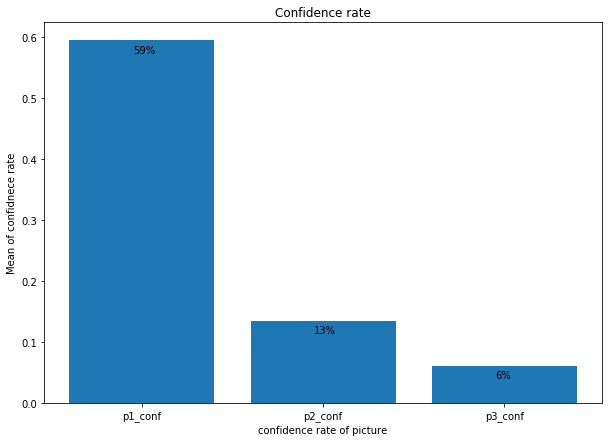

In [ ]:
#Compare confidence rate of p1.p2.p3

list = [df4.p1_conf.mean(),df4.p2_conf.mean(),df4.p3_conf.mean()]
plt.subplots(figsize=(10,7))
ax=plt.bar(height=list,x=['p1_conf','p2_conf','p3_conf'])
plt.xlabel('confidence rate of picture')
plt.ylabel('Mean of confidnece rate')
plt.title('Confidence rate');

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.0%}'.format(height), (x+0.35, y-0.02 + height-0.01 + 0.01))
    # arange the position of annotation 

In [ ]:
df['Hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['Minute'] = pd.to_datetime(df['timestamp']).dt.minute
df['Second'] = pd.to_datetime(df['timestamp']).dt.second
df['Count'] = 1

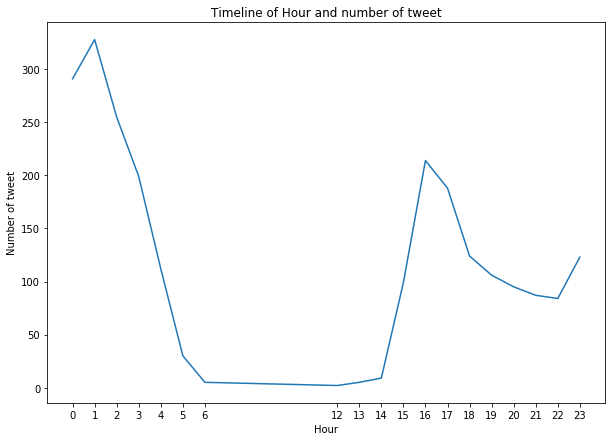

In [ ]:
keys = [pair for pair, df in df.groupby(['Hour'])]
plt.subplots(figsize=(10,7))
plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xlabel('Hour')
plt.ylabel('Number of tweet')
plt.xticks(keys)
plt.title('Timeline of Hour and number of tweet');

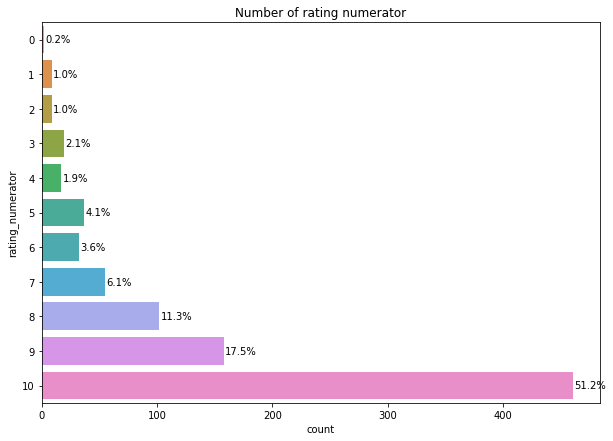

In [ ]:
plt.subplots(figsize=(10,7))
under_10 = df.query('rating_numerator<=10')
rating_numerator_counts = under_10.rating_numerator.value_counts()
rating_numerator_counts=rating_numerator_counts.sort_index(ascending=False)

ax=sns.countplot(data=under_10,y='rating_numerator')
plt.title('Number of rating numerator');


for i in range(rating_numerator_counts.shape[0]):
    count = rating_numerator_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/under_10.shape[0])
    plt.text(count+1,i,pct_string,va='center')
    # count+1,i is coordination of (x,y)

# <a name="conclusion"></a> 6.Conclusion

`1.` p1 shows higher possibility of confidene rate than p2 and p3 noticeably.Also the percentag of p2's confidence rate is two times heiger than p3. 


`2` There is no tweet data between 7 to 11 o'clock. I'm going to guess that generally people are at work and they just focus more on their work After lunch time they start to do twitter as usual and the more the time close to get off work the higher the number of active user.


`3` Rating system is very generous.Over 50% of pictures got perfect score.Notice we are handling only rating result with maximum point 10